<a href="https://colab.research.google.com/github/ciertou/handsonllms/blob/main/nlp_with_pytorch_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("helloworld!")

helloworld!


<Axes: >

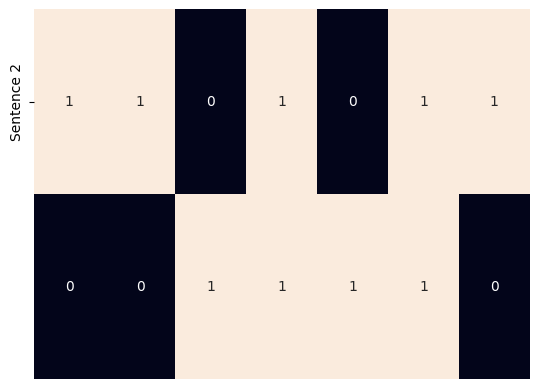

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
corpus = ['Time flies flies like an arrow.',
'Fruit flies like a banana.']
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(corpus).toarray()
sns.heatmap(one_hot, annot=True, cbar=False, xticklabels="", yticklabels=['Sentence 2'])

In [3]:
import torch

In [4]:
torch.cuda.is_available()

True

In [1]:
%%capture
!pip instanll accelerate

In [6]:
def describe(x):
  print("Type: {}".format(x.type()))
  print("Shape/size: {}".format(x.shape))
  print("Values: \n{}".format(x))

In [7]:
describe(torch.Tensor(2, 3))

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1.9807e-40, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 1.4013e-45, 0.0000e+00]])


In [8]:
describe(torch.rand(2, 3)) # uniform random
describe(torch.randn(2, 3)) # random normal

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.2084, 0.8405, 0.4043],
        [0.4505, 0.4764, 0.7647]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[ 1.0394,  0.1846, -0.9424],
        [-0.3562, -1.3676, -1.1783]])


In [9]:
describe(torch.zeros(2, 3))
x = torch.ones(2, 3)
describe(x)
x.fill_(5)
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0., 0., 0.],
        [0., 0., 0.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[5., 5., 5.],
        [5., 5., 5.]])


In [10]:
import torch
import numpy as np
npy = np.random.rand(2, 3)
describe(torch.from_numpy(npy))

Type: torch.DoubleTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0.2663, 0.6363, 0.3657],
        [0.6937, 0.7984, 0.2945]], dtype=torch.float64)


In [11]:
x = torch.FloatTensor([[1, 2, 3],
[4, 5, 6]])
describe(x)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [12]:
x = x.long()
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [13]:
x = torch.tensor([[1, 2, 3],
[4, 5, 6]], dtype=torch.int64)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]])


In [14]:
x = x.int()

In [15]:
describe(x)

Type: torch.IntTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[1, 2, 3],
        [4, 5, 6]], dtype=torch.int32)


In [16]:
import torch
x = torch.arange(6)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([6])
Values: 
tensor([0, 1, 2, 3, 4, 5])


In [17]:
x = x.view(2, 3)
describe(x)

Type: torch.LongTensor
Shape/size: torch.Size([2, 3])
Values: 
tensor([[0, 1, 2],
        [3, 4, 5]])


In [21]:
describe(torch.sum(x, dim=0))

Type: torch.LongTensor
Shape/size: torch.Size([3])
Values: 
tensor([3, 5, 7])


In [22]:
describe(torch.transpose(x, 0, 1))

Type: torch.LongTensor
Shape/size: torch.Size([3, 2])
Values: 
tensor([[0, 3],
        [1, 4],
        [2, 5]])


In [23]:
import torch
x = torch.ones(2, 2, requires_grad=True)
describe(x)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[1., 1.],
        [1., 1.]], requires_grad=True)
True


In [24]:
y = (x + 2) * (x + 5) + 3
describe(y)
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([2, 2])
Values: 
tensor([[21., 21.],
        [21., 21.]], grad_fn=<AddBackward0>)
True


In [25]:
z = y.mean()
describe(z)
z.backward()
print(x.grad is None)

Type: torch.FloatTensor
Shape/size: torch.Size([])
Values: 
21.0
False


In [28]:
# preferred method: device agnostic tensor instantiation
device = torch.device("cuda" if torch.cuda.is_available() else
"cpu")
print (device)

cuda


In [27]:
torch.cuda.is_available()

True

In [29]:
x = torch.rand(3, 3).to(device)
describe(x)

Type: torch.cuda.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.6350, 0.2195, 0.7436],
        [0.0536, 0.6821, 0.6641],
        [0.3055, 0.3658, 0.4098]], device='cuda:0')


In [30]:
x = torch.rand(3, 3).to(device)
describe(x)

Type: torch.cuda.FloatTensor
Shape/size: torch.Size([3, 3])
Values: 
tensor([[0.4072, 0.7304, 0.0807],
        [0.9195, 0.1656, 0.6500],
        [0.7293, 0.2576, 0.1474]], device='cuda:0')


In [36]:
y = torch.rand(3, 3).to(device)
x + y

tensor([[0.7090, 0.9027, 0.1940],
        [1.1872, 0.3921, 1.5405],
        [1.4116, 1.1647, 0.6221]], device='cuda:0')

In [35]:
import os

print("CUDA_VISIBLE_DEVICES:", os.environ.get("CUDA_VISIBLE_DEVICES"))

CUDA_VISIBLE_DEVICES: 0


In [34]:
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # or any desired GPU index


In [43]:
def n_grams(text, n):
  '''
  takes tokens or text, returns a list of n-grams
  '''
  return [text[i:i+n] for i in range(len(text)-n+1)]
cleaned = ['mary', ',', "n't", 'slap', 'green', 'witch', '.']
print(n_grams(cleaned, 3))

[['mary', ',', "n't"], [',', "n't", 'slap'], ["n't", 'slap', 'green'], ['slap', 'green', 'witch'], ['green', 'witch', '.']]
